<a href="https://colab.research.google.com/github/danielbehargithub/MuskTweets-Impact-on-TeslaStock/blob/main/logistic_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/market_hours_tweets_df.csv'
merged_df = pd.read_csv(file_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D


In [ ]:
def train_logistic_regression(merged_df, feature_columns, target_column, test_size=0.3, random_state=42, balanced=False):
    """
    Function to train a logistic regression model, with optional class balancing, make predictions, and evaluate performance.

    Parameters:
    - merged_df (DataFrame): The DataFrame containing the features and target column.
    - feature_columns (list): List of column names to be used as features for the model.
    - target_column (str): Name of the target column (the column we want to predict).
    - test_size (float): Proportion of the dataset to be assigned to the test set (default: 0.3).
    - random_state (int): Random seed for data splitting (default: 42).
    - balanced (bool): If True, enables class balancing in the logistic regression model (default: False).

    Returns:
    - model: Trained logistic regression model.
    - X_train: Training set features.
    - y_train: Training set labels.
    - X_test: Test set features.
    - y_test: Test set labels.
    - y_pred: Predicted labels for the test set.
    - y_pred_prob: Predicted probabilities for the test set.
    """

    # Clean features and target column
    X = merged_df[feature_columns].dropna()  # Drop rows with missing feature values
    y = merged_df.loc[X.index, target_column]  # Align the target with the cleaned feature indices

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a logistic regression model, optionally with balanced class weights
    if balanced:
        model = LogisticRegression(class_weight='balanced')
    else:
        model = LogisticRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Evaluate the model and print performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

    return model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob  # Return the model and test data predictions



In [ ]:
def plot_features_vs_predictions(X_test, y_test, y_pred_prob, feature_columns):
    """
    Plot predicted probabilities vs true labels for each of the feature columns provided.

    Parameters:
    - X_test (DataFrame): Test features.
    - y_test (Series): True labels of the test set.
    - y_pred_prob (ndarray): Predicted probabilities for the test set.
    - feature_columns (list): List of feature columns to plot.
    """
    num_features = len(feature_columns)

    if num_features == 1:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        ax = [ax]  # Turn it into a list for consistent indexing
    else:
        fig, ax = plt.subplots(1, num_features, figsize=(6 * num_features, 6))


    for i, feature in enumerate(feature_columns):
        ax[i].scatter(X_test[feature], y_pred_prob, color='blue', label='Predicted Probabilities', s=50, alpha=0.5)
        ax[i].scatter(X_test[feature], y_test, color='red', marker='x', label='True Labels', s=50, alpha=0.7)
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel('Prediction / True Label')
        ax[i].set_title(f'{feature} vs Predicted Probability')
        ax[i].legend()
        ax[i].yaxis.set_major_locator(MultipleLocator(0.1))
        ax[i].grid(True)  # Adding grid lines with the specified increments

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_decision_boundary(X_train, y_train, model, feature_columns):
    """
    Function to plot the decision boundary of a logistic regression model, supporting 1, 2, or more features.

    Parameters:
    - X_train (DataFrame): Training set features.
    - y_train (Series or array): Training set labels.
    - model: Trained logistic regression model.
    - feature_columns (list): List of features to plot (only the first two will be used for the 2D decision boundary plot).
    """

    num_features = len(feature_columns)

    if num_features == 1:
        # Single feature: Create a 1D plot
        feature = feature_columns[0]
        x_min, x_max = X_train[feature].min() - 1, X_train[feature].max() + 1
        x_values = np.linspace(x_min, x_max, 500).reshape(-1, 1)  # Generate 500 points between min and max

        # Predict the probabilities for the generated points
        y_prob = model.predict_proba(x_values)[:, 1]

        # Create the 1D plot
        plt.figure(figsize=(8, 6))
        plt.plot(x_values, y_prob, label='Predicted Probability', color='blue')
        plt.scatter(X_train[feature], y_train, c=y_train, cmap='coolwarm', edgecolors='k')
        plt.axhline(0.5, color='black', linestyle='--', label='0.5 Confidence Line')
        plt.title(f"1D Decision Boundary for {feature}")
        plt.xlabel(feature)
        plt.ylabel('Predicted Probability')
        plt.legend()
        plt.grid(True)
        plt.show()

    elif num_features >= 2:
        # Use the first two features for a 2D decision boundary plot
        feature1 = feature_columns[0]
        feature2 = feature_columns[1]

        h = .04  # step size
        x_min, x_max = X_train[feature1].min() - 1, X_train[feature1].max() + 1
        y_min, y_max = X_train[feature2].min() - 1, X_train[feature2].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict the probabilities on the grid
        Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z_prob = Z_prob.reshape(xx.shape)

        # Create the plot with two subplots
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))

        # **Graph 1: Confidence-based gradient using Green-Yellow-Red**
        cmap_confidence = LinearSegmentedColormap.from_list('confidence_colormap', ['green', 'yellow', 'red'])
        contour1 = ax[0].contourf(xx, yy, Z_prob, alpha=0.8, cmap=cmap_confidence, levels=np.linspace(0, 1, 100))
        scatter1 = ax[0].scatter(X_train[feature1], X_train[feature2], c=y_train, edgecolors='k', cmap=LinearSegmentedColormap.from_list('label_colors', ['black', 'magenta']))
        ax[0].contour(xx, yy, Z_prob, levels=[0.5], colors='black', linestyles='dashed')
        ax[0].set_title(f'Confidence-based Decision Boundary for {feature1} and {feature2}')
        ax[0].set_xlabel(feature1)
        ax[0].set_ylabel(feature2)

        # **Adding colorbar to the first plot (confidence-based)**
        colorbar1 = fig.colorbar(contour1, ax=ax[0], label='Predicted Probability')

        # **Graph 2: Fixed two-color background**
        cmap_fixed = ListedColormap(('lightcoral', 'lightblue'))
        ax[1].contourf(xx, yy, Z_prob, alpha=0.8, cmap=cmap_fixed, levels=[0, 0.5, 1])
        scatter2 = ax[1].scatter(X_train[feature1], X_train[feature2], c=y_train, edgecolors='k', cmap=LinearSegmentedColormap.from_list('label_colors', ['black', 'magenta']))
        ax[1].contour(xx, yy, Z_prob, levels=[0.5], colors='black', linestyles='dashed')
        ax[1].set_title(f'Fixed Two-color Decision Boundary for {feature1} and {feature2}')
        ax[1].set_xlabel(feature1)
        ax[1].set_ylabel(feature2)

        # Apply grid settings to both subplots
        for axis in ax:
            axis.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
            axis.xaxis.set_major_locator(MultipleLocator(1))
            axis.yaxis.set_major_locator(MultipleLocator(1))

        # Create a shared legend at the top
        from matplotlib.lines import Line2D
        custom_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='No Abnormal Increase'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='magenta', markersize=10, label='Abnormal Increase'),
                         Line2D([0], [0], color='black', lw=2, linestyle='dashed', label='0.5 Confidence Line')]

        fig.legend(handles=custom_legend, loc='upper center', ncol=3)

        # Display the plot
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so legend doesn't overlap
        plt.show()

    else:
        print("Not enough features provided for plotting.")


First try- define abnormal_increas as if abs(sloper) * 3 from before

Accuracy: 0.95
              precision    recall  f1-score   support

       False       0.95      1.00      0.97      1561
        True       0.00      0.00      0.00        83

    accuracy                           0.95      1644
   macro avg       0.47      0.50      0.49      1644
weighted avg       0.90      0.95      0.92      1644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


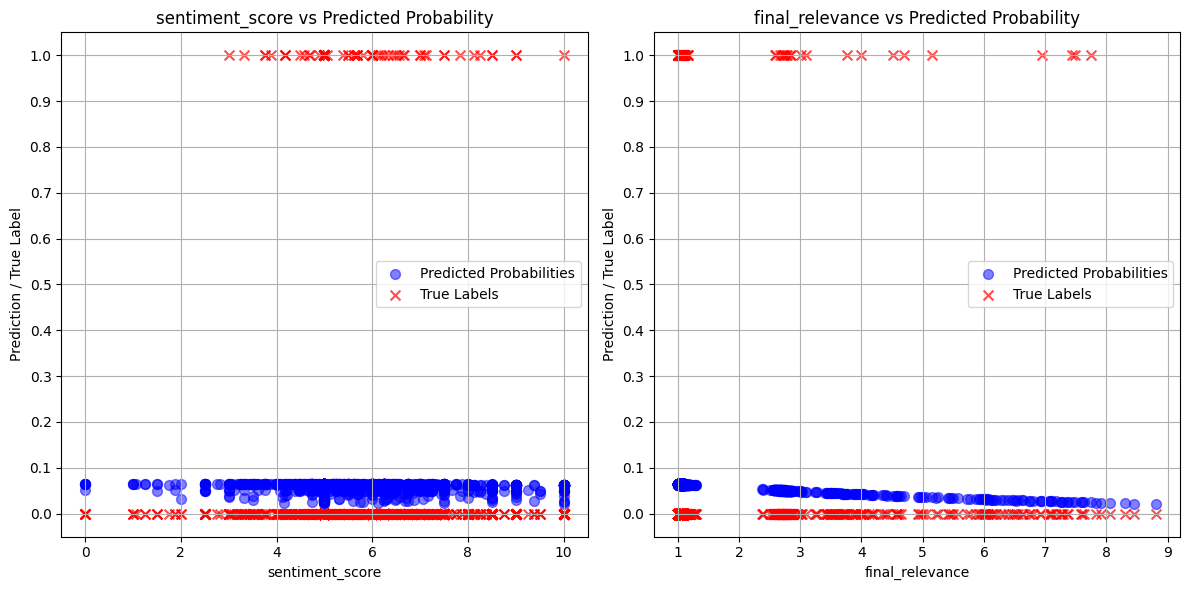

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


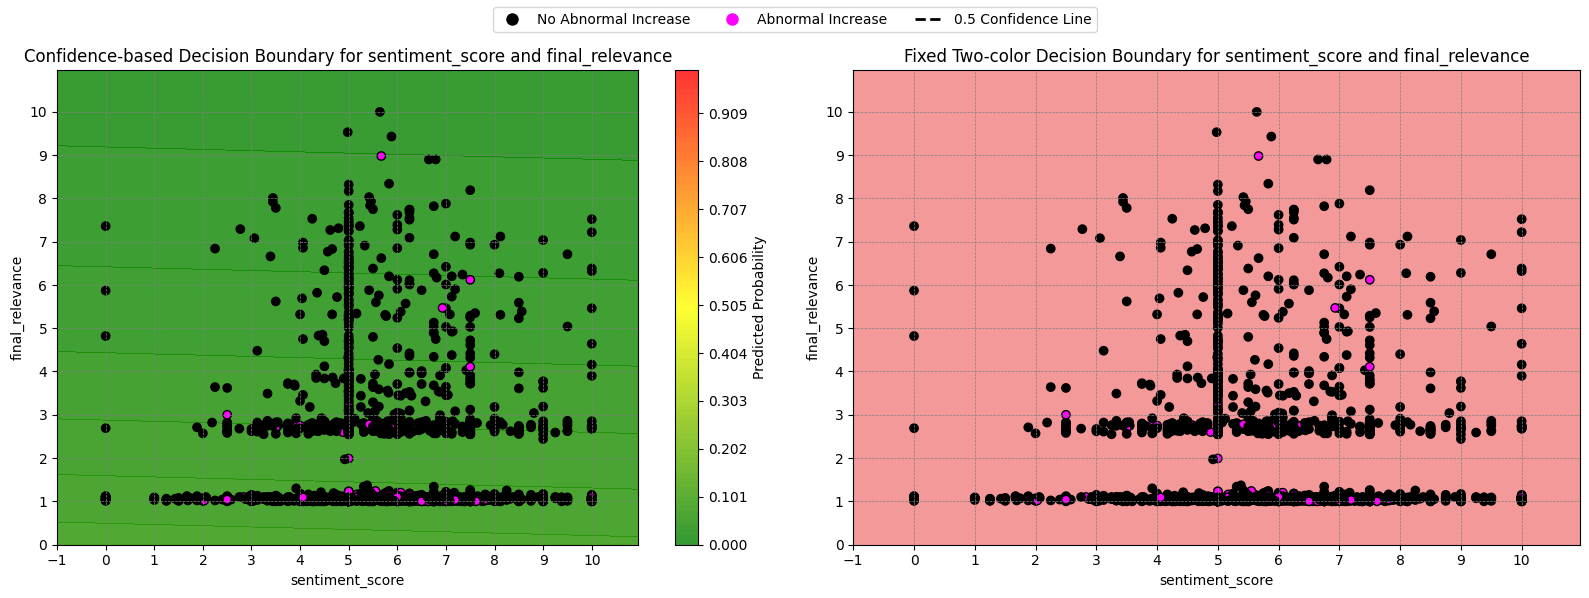

In [ ]:
merged_df['is_abnormal_increase'] = (abs(merged_df['slope_after']) > 3 * abs(merged_df['slope_before']))

feature_columns = ['sentiment_score', 'final_relevance']
# Usage of the function with class balancing
model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob = train_logistic_regression(
    merged_df,
    feature_columns,
    'is_abnormal_increase',
    balanced=False  # Enable class balancing here
)

# Example usage after making predictions
plot_features_vs_predictions(X_test, y_test, y_pred_prob, feature_columns)
# Example usage after model training
plot_decision_boundary(X_train, y_train, model, feature_columns)


:סיכום ניסיון ראשון

אחוז הצלחה כולל גבוה- 95%, בפועל לא הצליח לתפוס נקודות חריגות

בנוסף לא הצליח לייצר כלל הכרעה כלל- דוחה את כל הנקודות האפשריות


ניסיון שני:

הבנה כי הנקודות לא מאוזנות- נוסיף איזון בין מחלקות

Accuracy: 0.23
              precision    recall  f1-score   support

       False       0.94      0.21      0.34      1561
        True       0.05      0.75      0.09        83

    accuracy                           0.23      1644
   macro avg       0.49      0.48      0.21      1644
weighted avg       0.89      0.23      0.33      1644



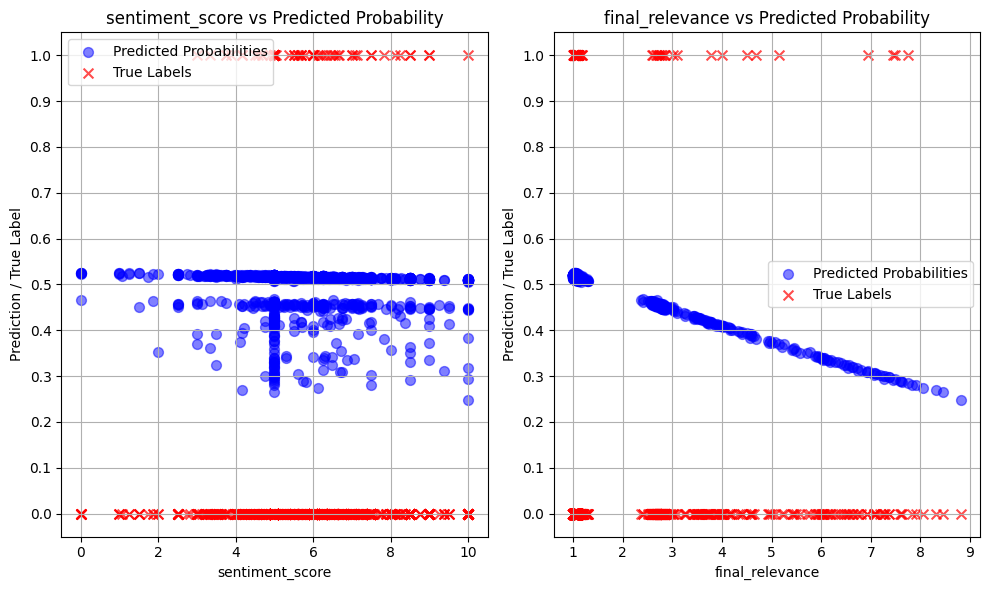

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


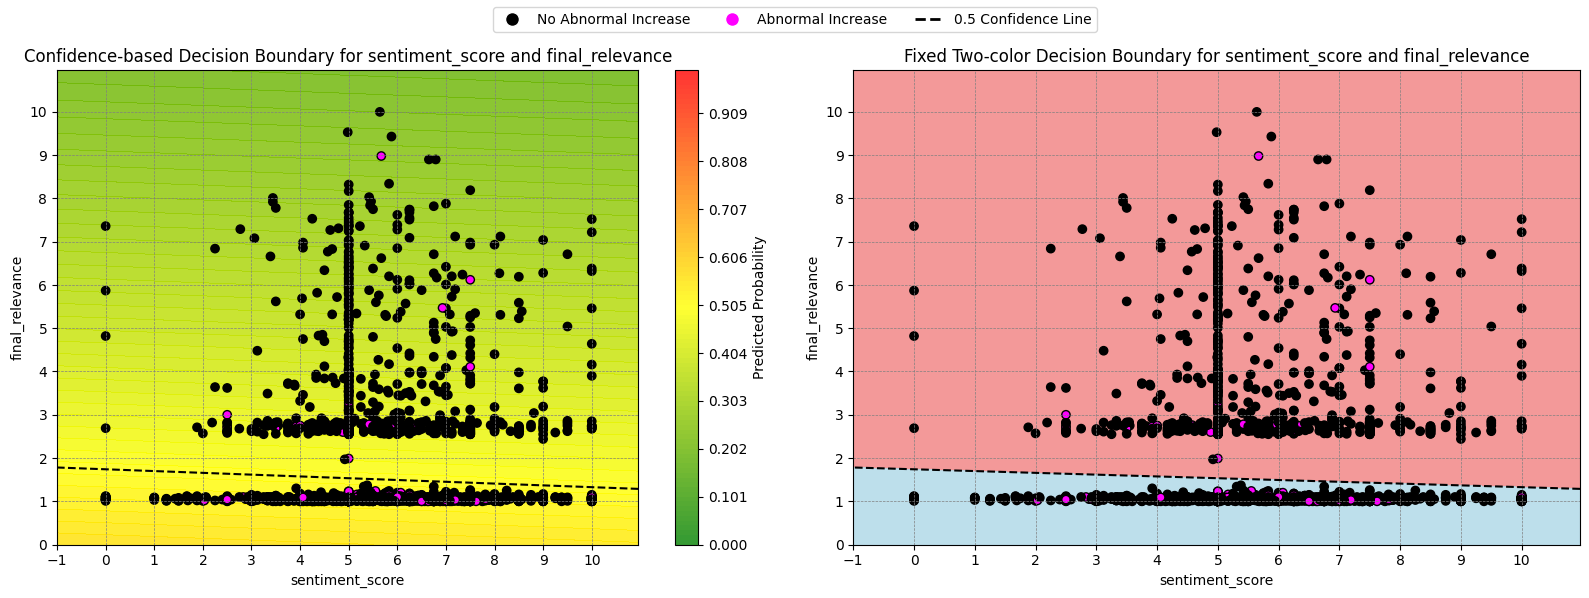

In [ ]:
merged_df['is_abnormal_increase'] = (abs(merged_df['slope_after']) > 3 * abs(merged_df['slope_before']))
feature_columns = ['sentiment_score', 'final_relevance']

# Usage of the function with class balancing
model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob = train_logistic_regression(
    merged_df,
    feature_columns,
    'is_abnormal_increase',
    balanced=True  # Enable class balancing here
)

# Example usage after making predictions
plot_features_vs_predictions(X_test, y_test, y_pred_prob, feature_columns)
# Example usage after model training
plot_decision_boundary(X_train, y_train, model, feature_columns)


סיכום ניסיון שני

אחרי האיזון ישנם תוצאות אבל הפוכות למצופה

 ניסיון שלישי

 לשנות את פונקציית המטרה( האם הייתה עלייה חריגה)

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1375
           1       0.17      0.22      0.19       269

    accuracy                           0.70      1644
   macro avg       0.50      0.50      0.50      1644
weighted avg       0.73      0.70      0.71      1644



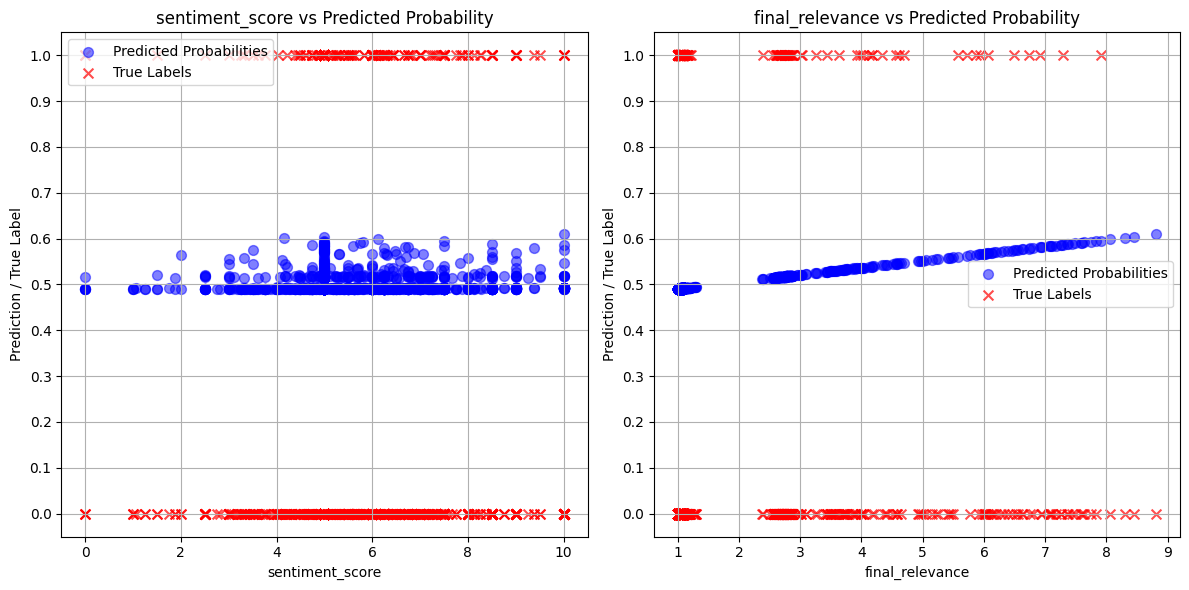

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


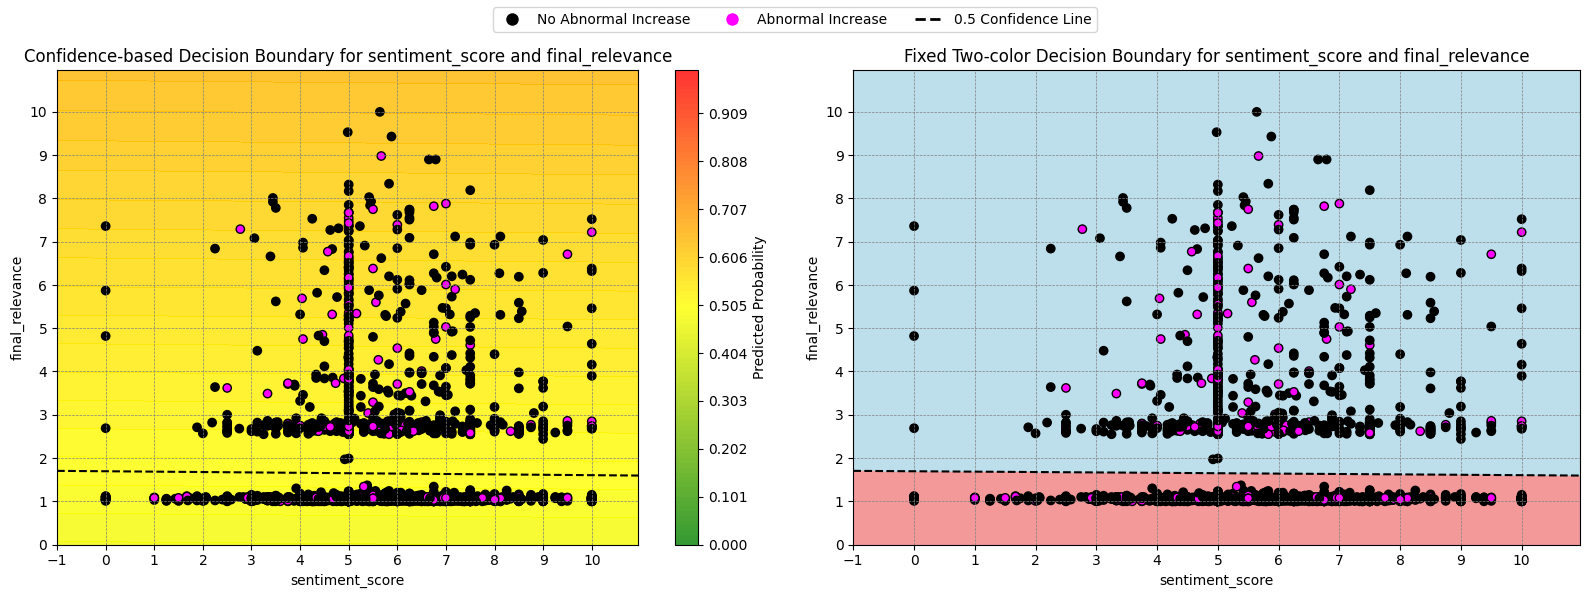

In [ ]:
threshold = 5
merged_df['absolute_change'] = abs(merged_df['percent_change_after'] - merged_df['percent_change_before'])
merged_df['is_abnormal_increase'] = (merged_df['absolute_change'] > threshold).astype(int)

feature_columns = ['sentiment_score', 'final_relevance']


# Usage of the function with class balancing
model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob = train_logistic_regression(
    merged_df,
    feature_columns,
    'is_abnormal_increase',
    balanced=True  # Enable class balancing here
)

# Example usage after making predictions
plot_features_vs_predictions(X_test, y_test, y_pred_prob, feature_columns)
# Example usage after model training
plot_decision_boundary(X_train, y_train, model, feature_columns)


נראה לא איכותי אך היגיוני- שמי שרלוונטי גורם לעלייה

ניסיון רביעי- השמטת פיצר סנטימנט

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1375
           1       0.17      0.22      0.19       269

    accuracy                           0.70      1644
   macro avg       0.50      0.50      0.50      1644
weighted avg       0.73      0.70      0.71      1644



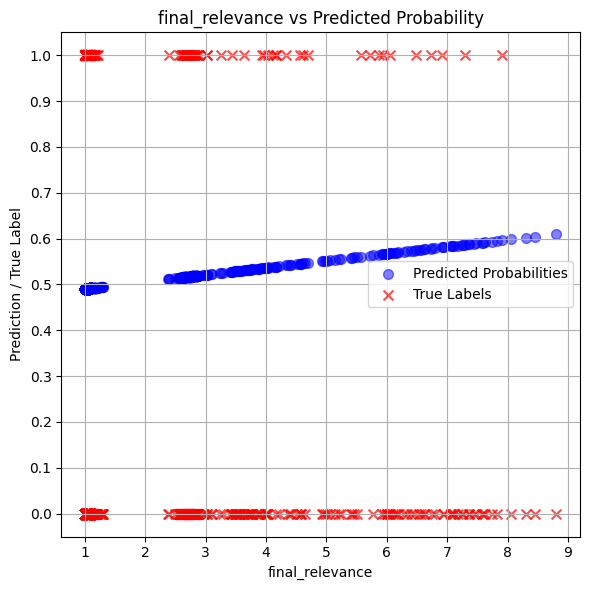

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


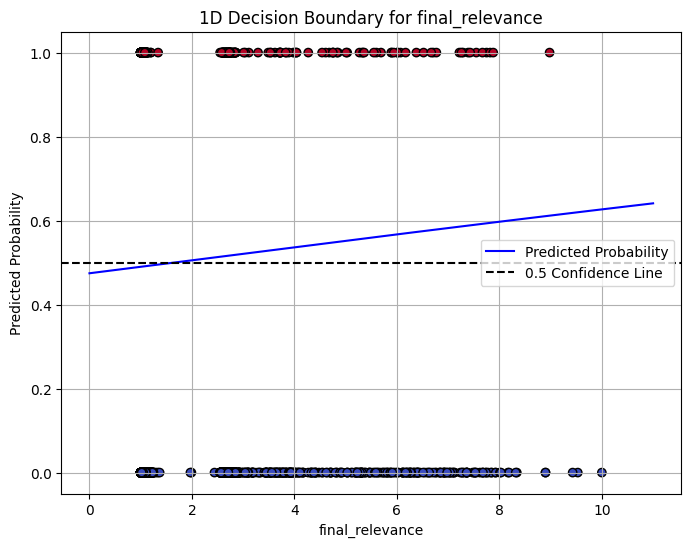

In [ ]:
threshold = 5
merged_df['absolute_change'] = abs(merged_df['percent_change_after'] - merged_df['percent_change_before'])
merged_df['is_abnormal_increase'] = (merged_df['absolute_change'] > threshold).astype(int)

feature_columns = ['final_relevance']


# Usage of the function with class balancing
model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob = train_logistic_regression(
    merged_df,
    feature_columns,
    'is_abnormal_increase',
    balanced=True  # Enable class balancing here
)

# Example usage after making predictions
plot_features_vs_predictions(X_test, y_test, y_pred_prob, feature_columns)
# Example usage after model training
plot_decision_boundary(X_train, y_train, model, feature_columns)


In [ ]:
correlation = merged_df[['sentiment_score', 'final_relevance']].corr()
print(correlation)


                 sentiment_score  final_relevance
sentiment_score         1.000000         0.014327
final_relevance         0.014327         1.000000


In [ ]:
print(f'Features used: {feature_columns}')
print(f'Coefficients: {model.coef_}')


Features used: ['sentiment_score', 'final_relevance']
Coefficients: [[0.00056193 0.06199539]]


ניתן להבין שהסנטימנט בצורתו הנוכחית בעל השפעה אפסית על המודל

*נכון למודל עם המספרים הספיצייפים

ניסיון חמישי- עם רגולציה

In [ ]:
def train_logistic_regression_with_regularization(merged_df, feature_columns, target_column, test_size=0.3, random_state=42, balanced=False, regularization='l2', C=0.1):
    """
    Function to train a logistic regression model with L2 regularization (Ridge),
    make predictions, and evaluate performance.

    Parameters:
    - merged_df (DataFrame): The DataFrame containing the features and target column.
    - feature_columns (list): List of column names to be used as features for the model.
    - target_column (str): Name of the target column (the column we want to predict).
    - test_size (float): Proportion of the dataset to be assigned to the test set (default: 0.3).
    - random_state (int): Random seed for data splitting (default: 42).
    - balanced (bool): If True, enables class balancing in the logistic regression model (default: False).
    - regularization (str): Type of regularization to apply ('l2' or 'l1').
    - C (float): Regularization strength; smaller values specify stronger regularization.

    Returns:
    - model: Trained logistic regression model.
    - X_train: Training set features.
    - y_train: Training set labels.
    - X_test: Test set features.
    - y_test: Test set labels.
    - y_pred: Predicted labels for the test set.
    - y_pred_prob: Predicted probabilities for the test set.
    """

    # Clean features and target column
    X = merged_df[feature_columns].dropna()  # Drop rows with missing feature values
    y = merged_df.loc[X.index, target_column]  # Align the target with the cleaned feature indices

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a logistic regression model with L2 regularization (ridge)
    model = LogisticRegression(penalty=regularization, C=C, class_weight='balanced' if balanced else None, solver='liblinear')

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Evaluate the model and print performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

    return model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob  # Return the model and test data predictions


Accuracy: 0.95
              precision    recall  f1-score   support

       False       0.95      1.00      0.97      1561
        True       0.00      0.00      0.00        83

    accuracy                           0.95      1644
   macro avg       0.47      0.50      0.49      1644
weighted avg       0.90      0.95      0.92      1644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


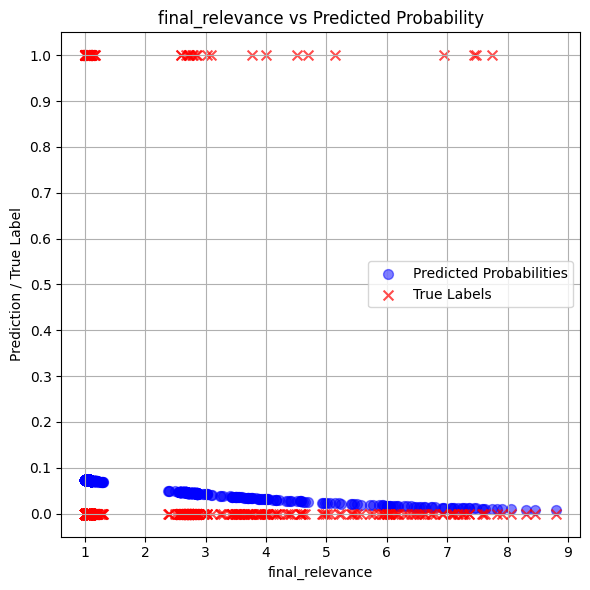

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


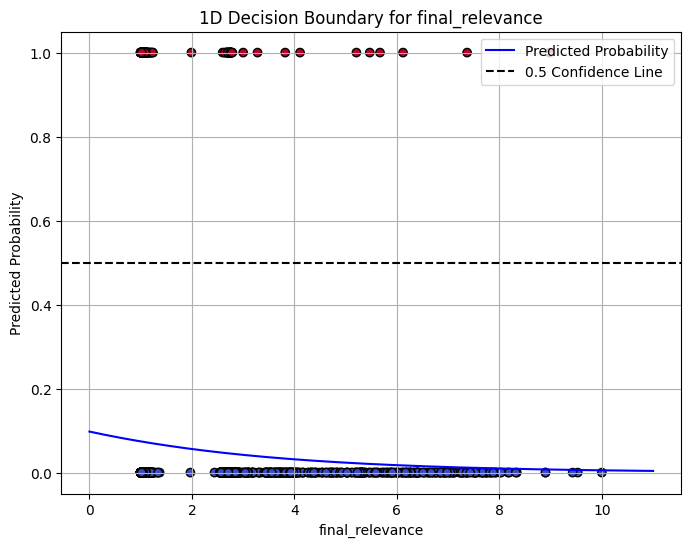

In [ ]:
model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob = train_logistic_regression_with_regularization(
    merged_df,
    feature_columns=['final_relevance'],
    target_column='is_abnormal_increase',
    test_size=0.3,
    random_state=42,
    regularization='l2',
    C=0.1
)

# Example usage after making predictions
plot_features_vs_predictions(X_test, y_test, y_pred_prob, ['final_relevance'])
# Example usage after model training
plot_decision_boundary(X_train, y_train, model, ['final_relevance'])


כמו שאנחנו רואים, לא עוזר, מראש המודל לא מספיק איכותי

ניסיון - שינוי ההפרש האבסולוטי

Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1194
           1       0.26      0.26      0.26       450

    accuracy                           0.60      1644
   macro avg       0.49      0.49      0.49      1644
weighted avg       0.60      0.60      0.60      1644



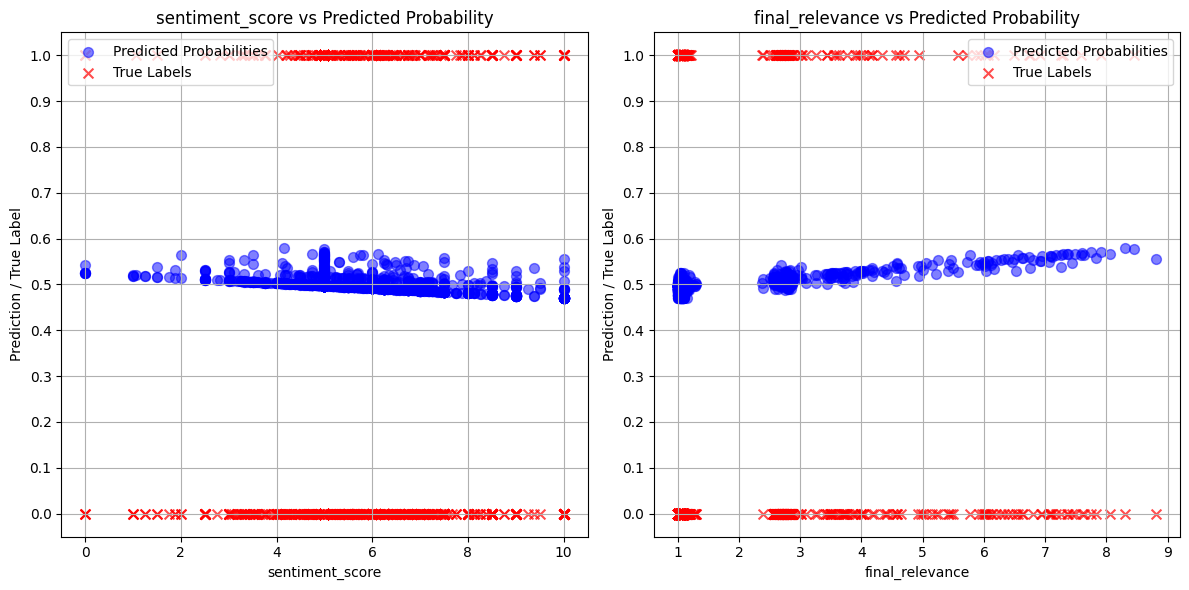

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


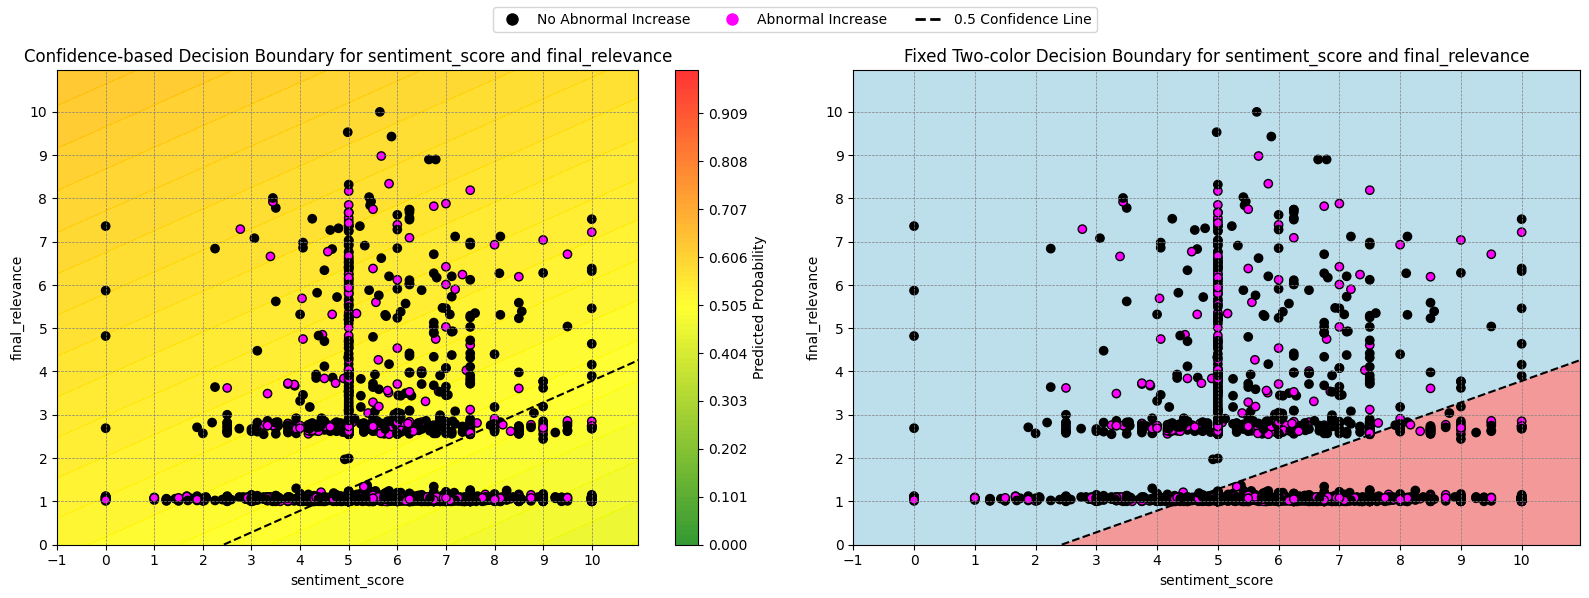

In [ ]:
threshold = 3
merged_df['absolute_change'] = abs(merged_df['percent_change_after'] - merged_df['percent_change_before'])
merged_df['is_abnormal_increase'] = (merged_df['absolute_change'] > threshold).astype(int)

feature_columns = ['sentiment_score', 'final_relevance']


# Usage of the function with class balancing
model, X_train, y_train, X_test, y_test, y_pred, y_pred_prob = train_logistic_regression(
    merged_df,
    feature_columns,
    'is_abnormal_increase',
    balanced=True  # Enable class balancing here
)

# Example usage after making predictions
plot_features_vs_predictions(X_test, y_test, y_pred_prob, feature_columns)
# Example usage after model training
plot_decision_boundary(X_train, y_train, model, feature_columns)


סיכום: מה שמעניין אותנו

PRECISION AND RECALL

המטרה לתפוס את העליות הגדולות במינימום סיכונים

בשילוב הנוכחי ששניהם 0.26, המשמעות היא

ברבע מהניסיות שלנו אנחנו פוגעים

ובסך הכל אנחנו תוספים רבע מהעליות החריגות


קובץ ציוצים יחד עם תוצאות

In [ ]:
X_test_df = merged_df.loc[X_test.index]
X_test_df['predicted_prob'] = y_pred_prob
X_test_df['y_pred'] = y_pred

X_test_df = X_test_df.sort_values(by='predicted_prob', ascending=False)


# Save the enriched results to a CSV
X_test_df.to_csv('enriched_tweet_probability_results.csv', index=False)


מדד לסף נדרש של precision

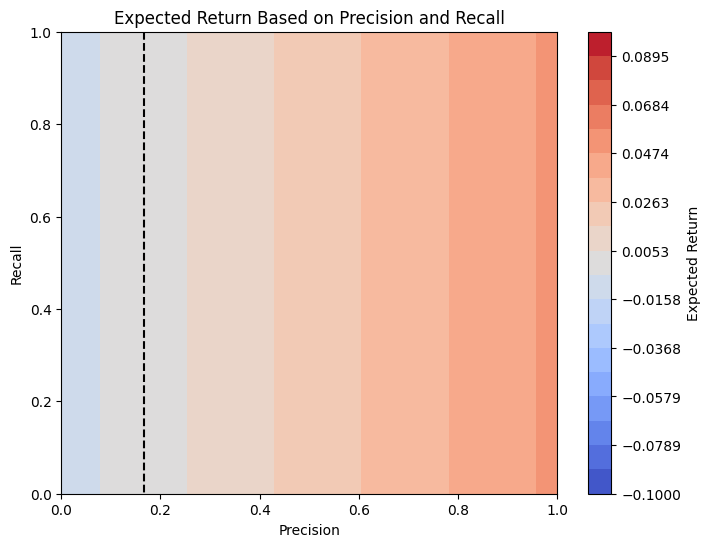

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_expected_return(precision, recall, positive_gain=0.03, false_positive_loss=0.01):
    """ Calculate the expected return based on precision and recall. """
    return (precision * positive_gain) - ((1 - precision) * false_positive_loss)

def plot_expected_return(positive_gain=0.03, false_positive_loss=0.01):
    # Create grid of precision and recall values
    precision_values = np.linspace(0, 1, 100)
    recall_values = np.linspace(0, 1, 100)
    Precision, Recall = np.meshgrid(precision_values, recall_values)

    # Calculate expected return for each combination of precision and recall
    expected_return = calculate_expected_return(Precision, Recall, positive_gain, false_positive_loss)

    # Plot the result
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(Precision, Recall, expected_return, levels=np.linspace(-0.1, 0.1, 20), cmap='coolwarm')
    plt.colorbar(contour, label='Expected Return')

    # Add a line where expected return = 0 (break-even point)
    plt.contour(Precision, Recall, expected_return, levels=[0], colors='black', linestyles='dashed')

    plt.title('Expected Return Based on Precision and Recall')
    plt.xlabel('Precision')
    plt.ylabel('Recall')

    # Show the plot
    plt.show()

# Call the function to plot
plot_expected_return()


חישוב מדד שארפ

In [ ]:
import numpy as np

# תשואות מהשקעות שבוצעו בעקבות המודל
returns = merged_df.loc[merged_df['is_abnormal_increase'] == 1, 'percent_change_after'] - merged_df.loc[merged_df['is_abnormal_increase'] == 1, 'percent_change_before']

# תשואה ממוצעת
mean_return = np.mean(returns)

# סטיית התקן של התשואות
std_return = np.std(returns)

# תשואה חסרת סיכון (לדוגמה, אג"ח ממשלתי ב-2% שנתי)
risk_free_rate = 0.02

# חישוב מדד שארפ
sharpe_ratio = (mean_return - risk_free_rate) / std_return

print("Sharpe Ratio:", round(sharpe_ratio, 3))
print("Mean:", round(mean_return, 3))
print("Std:", round(std_return, 3))



Sharpe Ratio: -0.053
Mean: -0.345
Std: 6.843
